Preparando Ambiente

In [2]:
import pandas as pd
pd.options.display.float_format = '{:.2f}'.format
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

base = pd.read_excel('base-vendas-cencosud.xlsx')
base.head(3)

,mes,faturamento,transacoes,qtdclientescompra,canal
0,2022-01-01,179443846,1338666,243653,Loja
1,2022-02-01,152703444,1130495,243289,Loja
2,2022-03-01,148760015,1100535,244717,Loja


In [3]:

def add_kpi(dataframe):
    df = dataframe
    # ticket medio - compras pelo numero de transações - define quanto os clientes tem gastado em uma compra 
    df['ticket_medio'] = df.faturamento / df.transacoes

    # spending - compras por cliente com compra - define a media do quanto é gastado pelos clientes
    df['spending_medio'] = df.faturamento / df.qtdclientescompra

    #transacoes media - define quantas vezes um cliente realiza compras com o cartão
    df['transacoes_media'] = df.transacoes / df.qtdclientescompra
    
    return df

def add_mes_ano(dataframe):
    df = dataframe
    df['ano'] = df.mes.dt.year
    df['mes_num'] = df.mes.dt.month
    return df

In [4]:
def grid_bar(df, x, y1, y2, y3, y4):
    
    plt.subplot(2,2,1)
    ax: ax = sns.barplot(df, x= x, y=y1)
    plt.subplot(2,2,2)
    ax: ax = sns.barplot(df, x= x, y=y2)
    plt.subplot(2,2,3)
    ax: ax = sns.barplot(df, x= x, y=y3)
    plt.subplot(2,2,4)
    ax: ax = sns.barplot(df, x= x, y=y4)
    ax.figure.set_size_inches(12,6)

def grid_line(df, x, y1, y2, y3, y4, hue):
    
    plt.subplot(2,2,1)
    ax: ax = sns.lineplot(df, x= x, y=y1, hue=hue, errorbar=None, markers=True)
    plt.subplot(2,2,2)
    ax: ax = sns.lineplot(df, x= x, y=y2, hue=hue, errorbar=None, markers=True)
    plt.subplot(2,2,3)
    ax: ax = sns.lineplot(df, x= x, y=y3, hue=hue, errorbar=None, markers=True)
    plt.subplot(2,2,4)
    ax: ax = sns.lineplot(df, x= x, y=y4, hue=hue, errorbar=None, markers=True)
    ax.figure.set_size_inches(12,6)
    

In [5]:
base_consolidado = add_kpi(base.groupby('mes').sum().reset_index())
base_consolidado.insert(0, 'variacao', base_consolidado.diff()['faturamento'], allow_duplicates=True)
print("Desvio Padrão Relativo", base_consolidado.faturamento.std() / base_consolidado.faturamento.mean() )
base_consolidado

Desvio Padrão Relativo 0.05047391935215026


C:\Users\Yan Cleiton\AppData\Local\Temp\ipykernel_13288\3124758314.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  base_consolidado = add_kpi(base.groupby('mes').sum().reset_index())


,variacao,mes,faturamento,transacoes,qtdclientescompra,ticket_medio,spending_medio,transacoes_media
0,NaN,2022-01-01,204570800,1602674,281322,127.64,727.18,5.70
1,-25885552.00,2022-02-01,178685248,1393229,281301,128.25,635.21,4.95
2,-1069597.00,2022-03-01,177615651,1397484,284241,127.10,624.88,4.92
3,18683489.00,2022-04-01,196299140,1519955,284767,129.15,689.33,5.34
4,-1623632.00,2022-05-01,194675508,1515238,280007,128.48,695.25,5.41
5,5205821.00,2022-06-01,199881329,1492430,280746,133.93,711.97,5.32
6,-2391854.00,2022-07-01,197489475,1472382,285173,134.13,692.53,5.16
7,-2225956.00,2022-08-01,195263519,1463359,282395,133.44,691.46,5.18
8,4608557.00,2022-09-01,199872076,1477458,263013,135.28,759.93,5.62
9,-7953820.00,2022-10-01,191918256,1442079,257364,133.08,745.71,5.60


**Analise de dados**

Com o objetivo de rentabilizar a carteira de clientes, é importante analisar o histórico de vendas para determinar ou compreender o perfil de compras da nossa base. A análise que fiz leva em consideração 3 indicadores principais: faturamento, quantidade de clientes com compra e quantidade de transações.

Para ter uma compreensão maior sobre o faturamento e identificar os fatores que trazem ou afastam vendas para a empresa, é necessário avaliar o comportamento ao longo do tempo. Abaixo estão os gráficos que representam como esses indicadores variaram durante os 14 meses analisados (jan/2022 - fev/2023).

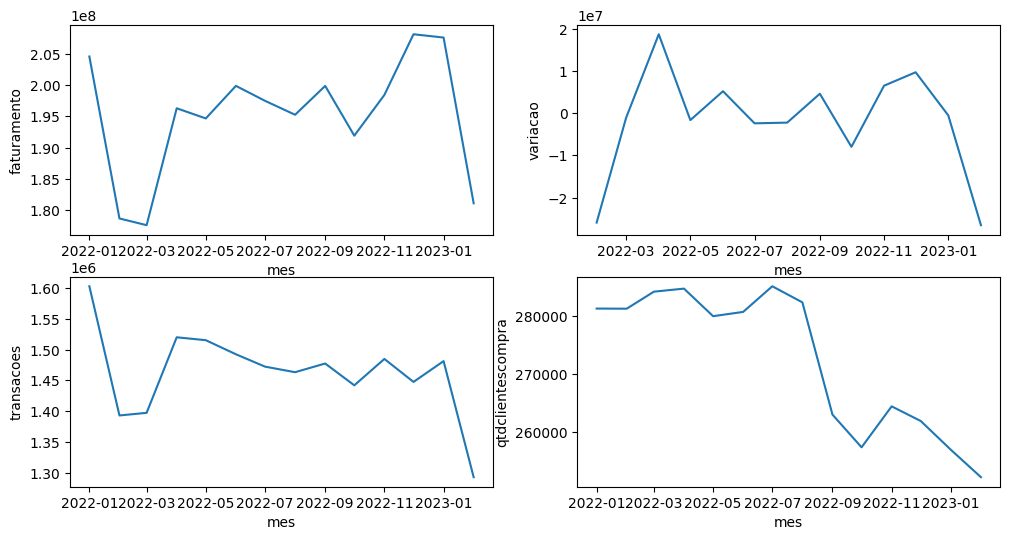

In [6]:
grid_line(base_consolidado,'mes', 'faturamento','variacao','transacoes', 'qtdclientescompra', None)

Pode-se notar que existe uma grande variação no faturamento e que, quando comparada com os outros indicadores, pode trazer informações importantes e pontos a serem observados:

Queda de faturamento entre janeiro e fevereiro - nos dois anos avaliados, as vendas de fevereiro tiveram um decréscimo bem expressivo de 12,65% em 2022 e 12,76% em 2023. É um período que deve ser observado com atenção.
O padrão entre os números de janeiro e fevereiro revela que o mercado tem tendência de um comportamento sazonal, permitindo que estratégias sejam definidas para atuação em períodos específicos.
Havendo esse comportamento sazonal, alguns períodos do ano podem revelar oportunidades de atuação, e duas delas merecem destaque:

Setembro - aumento no faturamento e queda no número de transações e clientes com compras (isso nos diz que atuações nesses dois indicadores podem trazer um resultado melhor nesse mês)
Outubro - queda em todos os indicadores revela a necessidade de compreender melhor a razão da queda em todos esses indicadores e traçar rotas para trazer mais compras com esse cartão.
Para ampliar nosso conhecimento sobre o faturamento, é importante olhar também para o canal onde o cartão foi emitido, neste caso, temos dois: app e loja.

In [7]:
base_canal = base.groupby('canal').mean().reset_index()
base_canal = add_kpi(base_canal)
base_canal

C:\Users\Yan Cleiton\AppData\Local\Temp\ipykernel_13288\142438513.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  base_canal = base.groupby('canal').mean().reset_index()


,canal,faturamento,transacoes,qtdclientescompra,ticket_medio,spending_medio,transacoes_media
0,Loja,166867067.71,1182376.93,234929.79,141.13,710.28,5.03
1,app,28243462.71,280710.71,37628.64,100.61,750.58,7.46


Para normalizar os resultados e comparar o perfil de compra dos dois canais em escalas semelhantes, criei 3 indicadores:

1 - Ticket Médio Mensal: Faturamento / Qtd. De Transações - revela quanto vale em média o carrinho de cada perfil.

2 - Spending Médio Mensal: Faturamento / Qtd. Clientes com compras - nos faz entender qual dos perfis gasta mais individualmente, ou seja, quem traz mais faturamento.

3 - Média de Transações Mensais: Qtd. De Transações / Qtd. Clientes com compras - tem relação com o uso do cartão e permite entender quem tem mais frequência no uso.

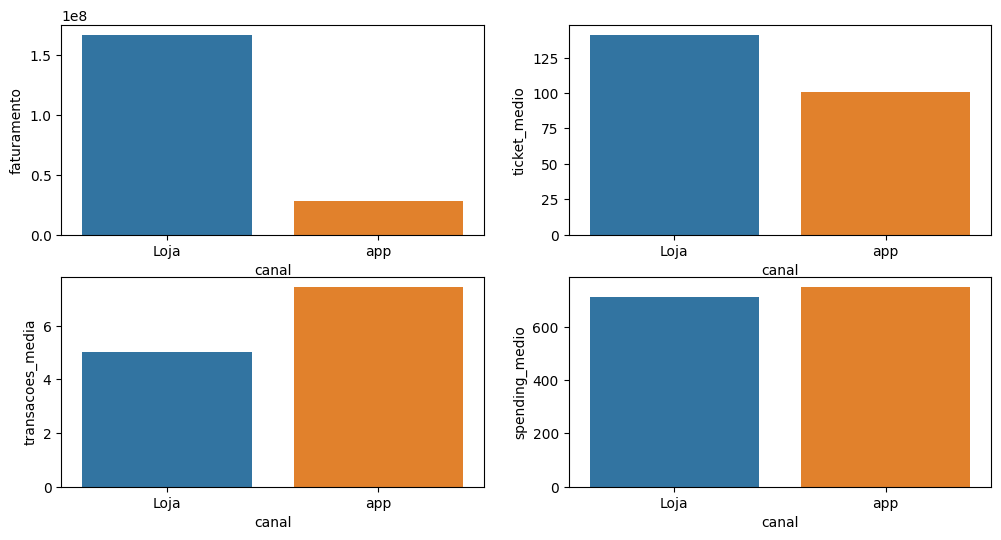

In [8]:
grid_bar(base_canal,'canal', 'faturamento','ticket_medio', 'transacoes_media', 'spending_medio')

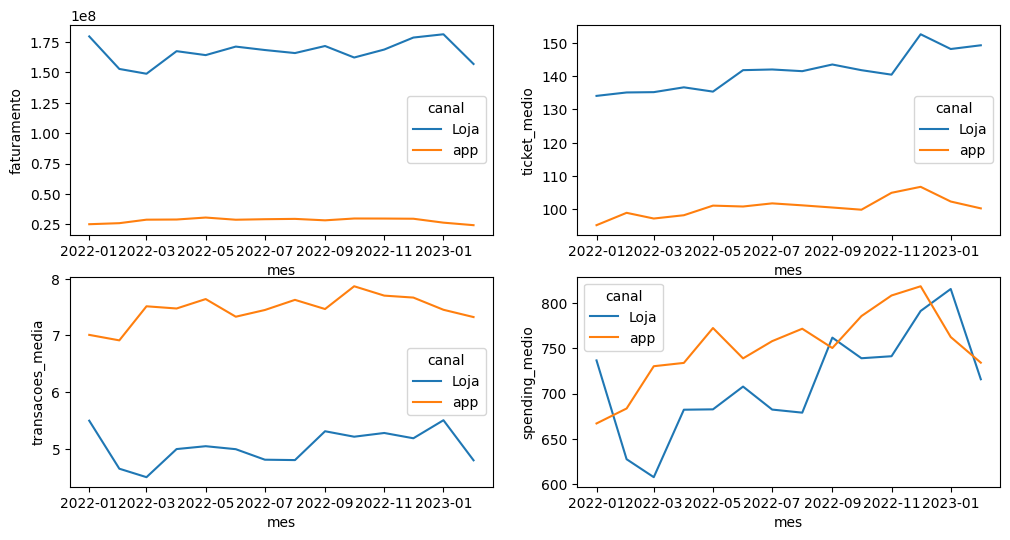

In [9]:
base_indicadores = add_kpi(base)
base = base[['mes','faturamento','transacoes','qtdclientescompra','canal']]
grid_line(base_indicadores,'mes', 'faturamento','ticket_medio','transacoes_media', 'spending_medio', 'canal')


Uma análise geral desses indicadores nos permite observar algumas diferenças no comportamento dos clientes:

1 - Clientes da loja fazem compras maiores.
2 - Clientes do app fazem mais compras e trazem mais faturamento individualmente.
Essas informações permitem propor algumas soluções e estratégias para aumentar a rentabilidade:

1 - Investir na captação de clientes do App: Como os clientes do aplicativo apresentam um maior gasto médio e trazem mais faturamento, a empresa pode investir em campanhas publicitárias e outras estratégias para atrair mais clientes para o aplicativo. Além disso, é importante manter uma boa experiência do usuário no aplicativo para fidelizar os clientes existentes.

2 - Realizar campanhas para aumentar a frequência de compras: A empresa pode desenvolver campanhas que incentivem os clientes a usar o cartão mais vezes, com descontos ou promoções especiais. Essas campanhas podem ser realizadas em momentos estratégicos, como nos meses em que o faturamento costuma cair.

3 - Aumentar o ticket médio dos clientes do App: Analisar as compras dos clientes do aplicativo pode revelar quais itens são mais populares e podem ser combinados em pacotes com preços especiais, incentivando os clientes a gastar mais em cada compra.

4 - Campanhas para aumentar a frequência de compras dos clientes Loja: A empresa pode desenvolver campanhas que incentivem os clientes que compram na loja a utilizar mais vezes o cartão, oferecendo vantagens exclusivas, descontos ou promoções especiais. Além disso, é importante criar uma experiência de compra agradável e personalizada para esses clientes, a fim de fidelizá-los.

5 - Programa de fidelidade: uma forma de incentivar a fidelidade dos clientes é através de um programa de fidelidade. Oferecer benefícios como descontos, acúmulo de pontos, brindes, entre outros, pode ser uma boa estratégia para incentivar os clientes a realizarem mais compras e a utilizarem mais o cartão.

6 - Analisar os motivos da queda nos indicadores em outubro: Investigar a causa da queda em todos os indicadores em outubro pode ajudar a identificar problemas na estratégia da empresa ou no mercado em que ela atua. Com base nessas informações, a empresa pode ajustar suas estratégias e processos para evitar quedas nos indicadores em futuros meses.

7 - Identificar outras oportunidades sazonais: Além de setembro e outubro, a empresa pode identificar outros períodos em que o comportamento do mercado ou dos clientes muda (como o crescimento nas vendas entre março e abril), e desenvolver estratégias específicas para esses momentos. Por exemplo, a empresa pode criar campanhas para incentivar as compras de Natal, Ano Novo, Dia das Mães, Dia dos Pais, entre outros.

8 - Melhoria da experiência do cliente: a experiência do cliente é fundamental para fidelizá-lo e incentivar suas compras. Investir em melhorias na experiência, como atendimento personalizado, facilidade de uso do cartão, processos mais eficientes, pode fazer toda a diferença na hora de manter o cliente fiel.

9 - Acompanhamento de métricas: para garantir que as estratégias adotadas estão surtindo efeito, é importante acompanhar constantemente as métricas de desempenho, como faturamento, qtd de clientes com compra e qtd de transações. Com base nesses dados, é possível ajustar as estratégias e maximizar os resultados.